# 1 - Linear Regression  

**Instructions:**
- Do not change anything in the code, unless we explicitly ask you to do so.

- We first import the necessary packages and modules: 
    - [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
    - [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
    - [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
    - [scipy](https://docs.scipy.org) : a collection of mathematical algorithms and convenience functions.
    - [imageio](https://imageio.readthedocs.io) :read and write a wide range of image data and scientific formats
    - PIL   : Image module : a module for manipulating Image objects (resizing an image for example)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import h5py
import scipy
import imageio
from PIL import Image
from lr_utils import load_dataset

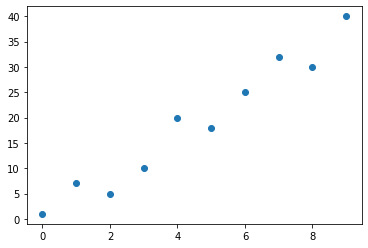

In [7]:
X = np.arange(10).reshape((10,1))        #generating some random data 
y = np.array([1, 7, 5, 10, 20, 18, 25, 32, 30, 40], ndmin = 2).reshape((10,1))
plt.scatter(X,y)
plt.show()


In [8]:
def compute_cost (X, y, theta):  # define cost function for a one variable linear regression  
    m = X.shape[0]
    cost = (1/(2*m))* np.sum(np.power(np.dot(X, theta)-y, 2))
    return cost 

In [9]:
def gradientDescent (X, y, theta, learning_rate , num_iters , print_cost = False) : 
    costs = []                             # define gradient descent for a one variable linear regression 
    m= y.shape[0]
    plt.figure(figsize = (12,20))
    print("initial cost : "+ str(compute_cost(X,y,theta)))
    for i in range(num_iters) :
        cost = compute_cost(X, y, theta)
        costs.append(cost)
        theta_ = theta
        theta[0] = theta_[0] - (learning_rate/m) * np.sum(np.dot(X, theta_)-y) 
        theta[1] = theta_[1] - (learning_rate/m) * np.sum(np.dot(X, theta_)-y * X[:,1])
        
        if (print_cost) :              # print the cost and the learned function for each iteration of Gradient Descent
            print("step number :"+ str(i+1) + "  cost : "+ str(cost))
            plt.subplot(5,2,i+1)
            plt.scatter(X[:,1],y)
            plt.plot(X[:,1], np.dot(X,theta), c='r')
            plt.title("itertion :"+ str(i+1))
            plt.ylabel('Y-axis')
    plt.show()
    return theta, costs

In [10]:
m= X.shape[0]      # get the number of examples in our "dataset"
theta = np.zeros((2,1)).reshape((2,1))      #initialize weights to a vector of zeros
columnOfOnes = np.ones((m,1))
X_ = np.append(columnOfOnes, X, axis = 1)      #adding a column of ones corresponding to X0

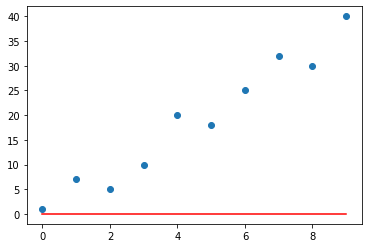

In [11]:
plt.scatter(X,y)
plt.plot(X, np.dot(X_,theta), c='r')
plt.show()

initial cost : 252.4
step number :1  cost : 252.4
step number :2  cost : 195.43730669354846
step number :3  cost : 147.12950960092437
step number :4  cost : 106.85492657315663
step number :5  cost : 74.02983420535105
step number :6  cost : 48.10628926657233
step number :7  cost : 28.57007176612713
step number :8  cost : 14.938742953225926
step number :9  cost : 6.759811914025059
step number :10  cost : 3.6090047770430007


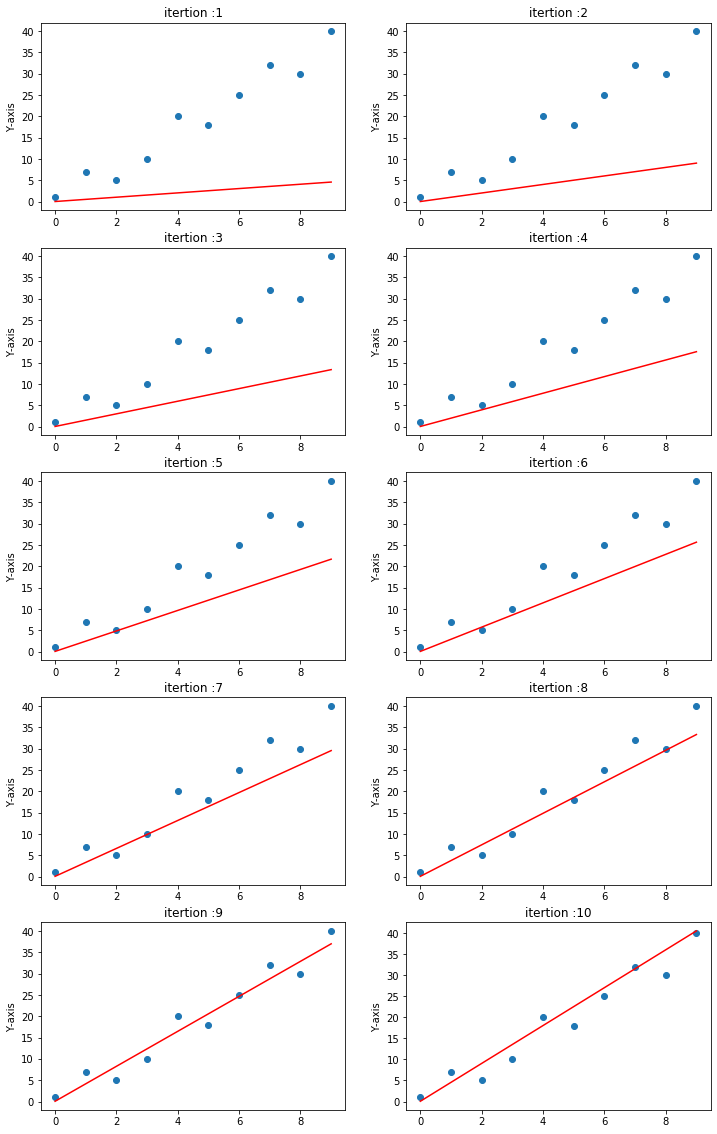

In [12]:
theta = np.zeros((2,1)).reshape((2,1))
theta_f, costs = gradientDescent(X_, y, theta, learning_rate = 0.0006, num_iters = 10, print_cost =True)

### learning curve : 

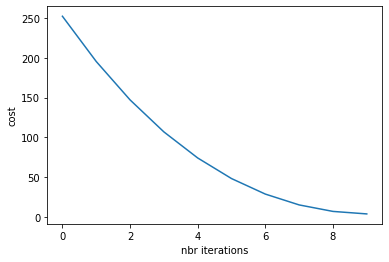

In [13]:
plt.plot(costs)  # plotting the cost to the number of iterations function 
plt.xlabel("nbr iterations")
plt.ylabel("cost")
plt.show()

## 1 - 2 Normal equation
<img src="images/normal_equation.JPG" style="width:600;height:200;">

cost : 3.543636363636363


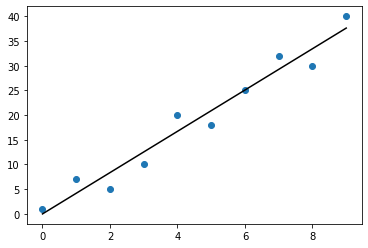

In [14]:
theta_norm = np.dot(np.linalg.inv(np.dot(X_.T,X_)), np.dot(X_.T,y)) # numpy implementation of the normal equation
print("cost : " +str(compute_cost(X_, y, theta_norm)))
plt.scatter(X,y)                             #plotting the learned linear function with the normal equation 
plt.plot(X, np.dot(X_,theta_norm), c='k')
plt.show()

# 2 - Logistic regression :

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

In [17]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()    

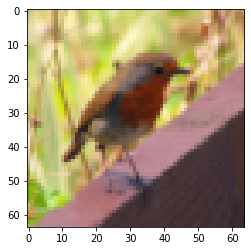

In [18]:
index = 10                          #you can change the index to visualize other images
plt.imshow(train_set_x_orig[index])

In [21]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


- we need to flatten our input data so we can use the vectorized implementation

In [22]:
train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T

- we have to normalize our data, we can just devise by 255 since we know our data is between 0 and 255

In [23]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

In [26]:
def sigmoid(z):

    s = 1/(np.exp(-z)+1)
    
    return s

In [27]:
def initialize_with_zeros(dim):

    w = np.zeros((dim,1))
    b = 0.0
    
    return w, b

In [28]:
def cost_gradient_log_reg(X, y, w, b):        
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)                                    # compute activation
    cost = (-1/m)* np.sum((y*np.log(A)+(1-y)*np.log(1-A)),axis=1)
    dw = (1/m)*(np.dot(X,(A-y).T))
    db = (1/m)*np.sum(A-y)
    
    assert(db.dtype == float)

    grads =  {"dw": dw,
             "db": db}
    return cost, grads

In [29]:
def gradientDescent_log (X, Y, w, b, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        
        cost,grads = cost_gradient_log_reg(X,Y,w,b)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule 
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [30]:
def predict(X, w, b):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        
        Y_prediction[0,i]= 1 if A[0,i] > 0.5 else 0 
        
    return Y_prediction

In [31]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = gradientDescent_log( X_train, Y_train, w , b, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(X_test,w,b)
    Y_prediction_train = predict(X_train,w,b)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [32]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1.0, your algorithm predicts a cat picture.


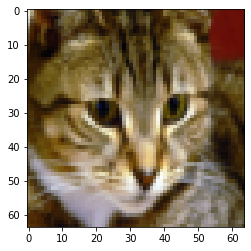

In [35]:
index = 15 # Fell free to change the index to load another image
#print(d["Y_prediction_test"] == test_set_y)

plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print("y = " + str(d["Y_prediction_test"][0,index]) + ", your algorithm predicts a cat picture." if d["Y_prediction_test"][0,index] else "y = " + str(d["Y_prediction_test"][0,index]) +", your algorithm predicts a non cat picture.")

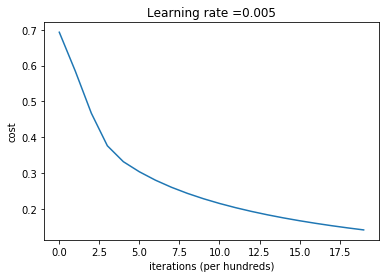

In [38]:
plt.plot(costs)    #plotting cost to the number of iterations(in hundreds) function
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

(12288, 1)
y = 1, your algorithm predicts a cat picture.


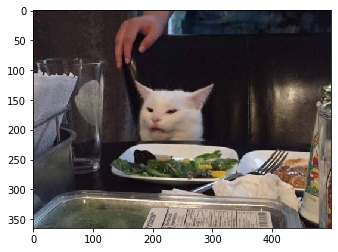

In [53]:
my_image = "images.JPG"   # change this to the name of your image file 
# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(imageio.imread(fname))
my_image = np.array(Image.fromarray(image).resize((num_px,num_px))).reshape((1,3*num_px*num_px)).T
my_image = my_image / 255.
my_predicted_image = predict(my_image,d["w"], d["b"])
plt.imshow(image)

pred = int(np.squeeze(my_predicted_image))
print("y = " + str(pred) + ", your algorithm predicts a cat picture." if pred else "y = " + str(pred) +", your algorithm predicts a non cat picture.")